In [ ]:
! pip install seaborn==0.13.0
! pip install matplotlib==3.7.3

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

from utils import read_result, read_result_reverse

dataset_dict = {
    "dataset1": "1: SimSame",
    "dataset2": "2: SimDiff",
    "dataset3": "3: DisSame",
    "dataset4": "4: DisDiff",
}

FONTSIZE = 16
FIGSIZE = (9, 4)

/home/m-isonuma/.conda/envs/untrac/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# UnTrac

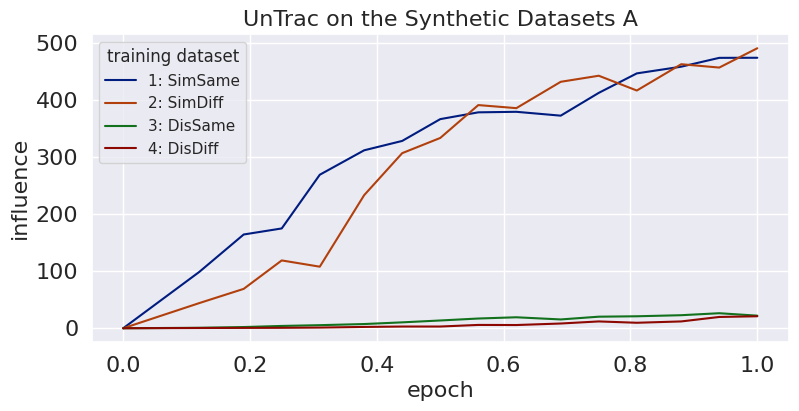

In [2]:
df_result = read_result(
    output_dir_format=f"model/t5/unlearn-optim=adafactor-max_grad_norm=0-t5_00-synthetic_train00_dataset-dataset_names={{}}-synthetic_eval00_dataset/",
    dataset_names=[f"dataset{i}" for i in range(1, 5)],
    key_column="epoch",
)
df_result["training dataset"] = df_result.apply(lambda row: dataset_dict[row.name], axis=1)

plt.figure(figsize=FIGSIZE)
ax = sns.lineplot(x="epoch", y="dataset0", hue="training dataset", data=df_result, palette="dark")
ax.set_title("UnTrac on the Synthetic Datasets A", fontsize=FONTSIZE)
ax.set_xlabel("epoch", fontsize=FONTSIZE)
ax.set_ylabel("influence", fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE);

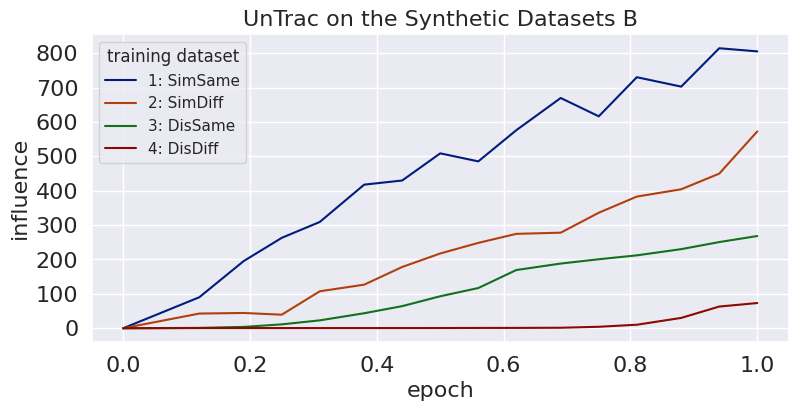

In [3]:
df_result = read_result(
    output_dir_format=f"model/t5/unlearn-optim=adafactor-max_grad_norm=0-t5_10-synthetic_train10_dataset-dataset_names={{}}-synthetic_eval10_dataset/", 
    dataset_names=[f"dataset{i}" for i in range(1, 5)],
    key_column="epoch",
)
df_result["training dataset"] = df_result.apply(lambda row: dataset_dict[row.name], axis=1)

plt.figure(figsize=FIGSIZE)
ax = sns.lineplot(x="epoch", y="dataset0", hue="training dataset", data=df_result, palette="dark")
ax.set_title("UnTrac on the Synthetic Datasets B", fontsize=FONTSIZE)
ax.set_xlabel("epoch", fontsize=FONTSIZE)
ax.set_ylabel("influence", fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE);

# UnTrac-Inv

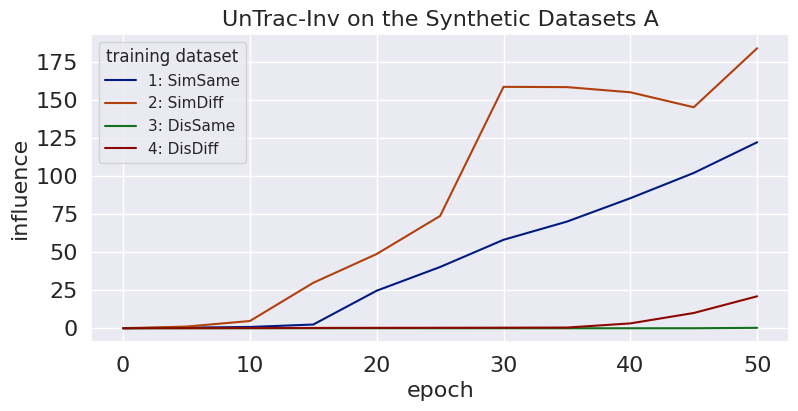

In [4]:
df_result = read_result_reverse(
    output_dir_format=f"model/t5/unlearn-optim=adafactor-max_grad_norm=0-train_batch=2-accumul=128-t5_00-synthetic_eval00_dataset-synthetic_train00_dataset-each_eval_samples=256",
    dataset_names=[f"dataset{0}"],
    key_column="epoch",
    init_dir="model/t5_00",
)
df_result["training dataset"] = df_result.apply(lambda row: dataset_dict[row.name], axis=1)

plt.figure(figsize=FIGSIZE)
ax = sns.lineplot(x="epoch", y="dataset0", hue="training dataset", data=df_result, palette="dark")
ax.set_title("UnTrac-Inv on the Synthetic Datasets A", fontsize=FONTSIZE)
ax.set_xlabel("epoch", fontsize=FONTSIZE)
ax.set_ylabel("influence", fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE);

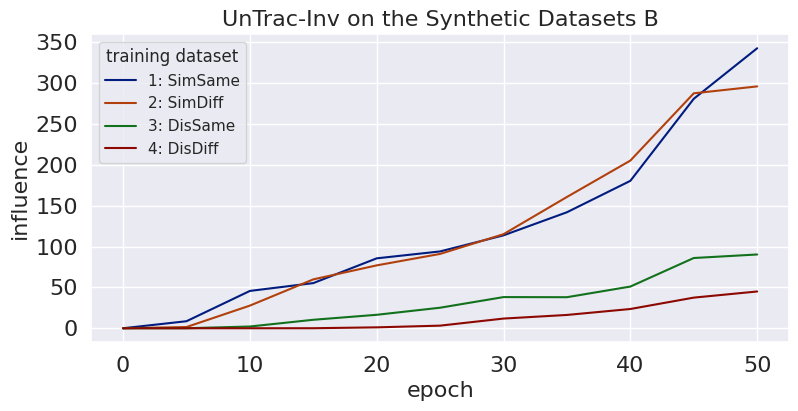

In [5]:
df_result = read_result_reverse(
    output_dir_format=f"model/t5/unlearn-optim=adafactor-max_grad_norm=0-train_batch=2-accumul=128-t5_10-synthetic_eval10_dataset-synthetic_train10_dataset-each_eval_samples=256",
    dataset_names=[f"dataset{0}"],
    key_column="epoch",
    init_dir="model/t5_10", 
)
df_result["training dataset"] = df_result.apply(lambda row: dataset_dict[row.name], axis=1)

plt.figure(figsize=FIGSIZE)
ax = sns.lineplot(x="epoch", y="dataset0", hue="training dataset", data=df_result, palette="dark")
ax.set_title("UnTrac-Inv on the Synthetic Datasets B", fontsize=FONTSIZE)
ax.set_xlabel("epoch", fontsize=FONTSIZE)
ax.set_ylabel("influence", fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE);